In [1]:
#import cdsapi
import pandas as pd
#import netcdf4
import xarray as xarr # pandas based library for 
            # labeled data with N-D tensors at each dimensions
import matplotlib.pyplot as plt
%matplotlib inline 
import cartopy
import cartopy.crs as ccrs
import numpy as np
import geopandas
import salem
import pandas_profiling
import seaborn as sns

In [2]:
# Read the data Path where it is stored on the Computer
#data_dir = input('Path to the data\n')
data_dir = "C:\\Users\\kurt_\\Data\\crop_climotology\\"

In [3]:
# Import data as xarray dataset from the directory
dask = True
if dask:
    # Import with dask
    clim = xarr.open_mfdataset(data_dir+'*.nc', parallel=True, 
                              combine='by_coords', chunks={'time': 50}
                             , engine='netcdf4')
    print(f'The chunk size for time dimension is {clim.chunks["time"][0]}\n')
    print(f'dataset, thus, have {len(clim.time)/clim.chunks["time"][0]} chunks')
else:
    # Import without dask for debugging
    clim = xarr.open_mfdataset(data_dir+'*.nc', parallel=False, 
                          combine='by_coords', engine='netcdf4')

The chunk size for time dimension is 50

dataset, thus, have 21.6 chunks


In [4]:
#print(clim.data_vars)
#print(clim.coords)
clim

&lt;xarray.Dataset&gt;
Dimensions:      (bounds: 2, lat: 360, lon: 720, time: 1080)
Coordinates:
  * time         (time) datetime64[ns] 1981-01-05 1981-01-15 ... 2010-12-25
  * lat          (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: bounds
Data variables:
    time_bounds  (time, bounds) datetime64[ns] dask.array&lt;chunksize=(50, 2), meta=np.ndarray&gt;
    BEDD         (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    DTR          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    FD           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    ID           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    R10mm        (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    R20mm        (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    RR           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    RR1          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    SDII         (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    SU           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TG           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TN           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TNn          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TNx          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TR           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TX           (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TXn          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
    TXx          (time, lat, lon) float32 dask.array&lt;chunksize=(50, 360, 720), meta=np.ndarray&gt;
Attributes:
    title:          BEDD index from ECA heat indices
    institution:    Copernicus Climate Change Service
    comment:        
    history:         \n2019-04-26 13:25:29 Calculation of BEDD indice (dekada...
    summary:        
    Conventions:    CF-1.7
    contact:        https://climate.copernicus.eu
    project:        C3S_422 Global Agriculture
    creation_date:  2019-04-26T13:25:29GMT
    lineage:        
    keywords:       
    license:        
    references:     Tank, A.K., 2010. European Climate Assessment and Dataset...
    source:         The WFDEI meteorological forcing data set: WATCH Forcing ...

In [6]:
# The shape of a variable
mnt_sub.TG

&lt;xarray.DataArray &#39;TG&#39; (time: 1080, lat: 360, lon: 720)&gt;
dask.array&lt;open_dataset-d517adfe38fafbbc7b4d8db68bb90d52TG, shape=(1080, 360, 720), dtype=float32, chunksize=(50, 360, 720), chunktype=numpy.ndarray&gt;
Coordinates:
  * time     (time) datetime64[ns] 1981-01-05 1981-01-15 ... 2010-12-25
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    units:         K
    long_name:     Mean of daily mean temperature
    cell_methods:  time: mean

In [7]:
for var in clim:
    print(f'Variables in the data: {clim[var].attrs}')
# Let's select the first time step and plot the 2m-air temperature

# Let's check the dimensions
for dim in clim.dims:
    dimsize = clim.dims[dim]
    print(f'\nData has {dimsize} {dim} ')
    if dim == 'latitude':
        print(f' latitudes: from {float(clim[dim].min())} degree South',
     f'to {float(clim[dim].max())} degree North')
    if dim == 'longitude':
        print(f' Longitudes: from {float(clim[dim].max())} degree East',
     f'to {float(clim[dim].min())} degree West')
    if dim == 'time':
        print(f'time: from {pd.to_datetime(clim["time"].min().values)} to {pd.to_datetime(clim["time"].max().values)} ')

Variables in the data: {}
Variables in the data: {&#39;units&#39;: &#39;degrees_C&#39;, &#39;long_name&#39;: &#39;Biologically Effective Degree Days&#39;, &#39;cell_methods&#39;: &#39;time: sum&#39;}
Variables in the data: {&#39;units&#39;: &#39;&#39;, &#39;long_name&#39;: &#39;Mean of diurnal temperature range&#39;, &#39;cell_methods&#39;: &#39;time: mean&#39;}
Variables in the data: {&#39;units&#39;: &#39;day&#39;, &#39;long_name&#39;: &#39;Frost days (minimum temperature &lt; 0 degrees_C)&#39;, &#39;cell_methods&#39;: &#39;time: sum&#39;}
Variables in the data: {&#39;units&#39;: &#39;day&#39;, &#39;long_name&#39;: &#39;Ice days (maximum temperature &lt; 0 degrees_C)&#39;, &#39;cell_methods&#39;: &#39;time: sum&#39;}
Variables in the data: {&#39;units&#39;: &#39;day&#39;, &#39;long_name&#39;: &#39;Heavy precipitation days (precipitation &gt;= 10 mm)&#39;, &#39;cell_methods&#39;: &#39;time: sum&#39;}
Variables in the data: {&#39;units&#39;: &#39;day&#39;, &#39;long_name&#39;: &#39;Ver

# Preparing The Crop Production Data
Crop Data is obtained from:


### Alfalfa Hay
Alfalfa hay is produced mostly in North-Western States. Among them it is produced throughout all Montana and in most of the Idaho which makes them more convenient for agroclimatic analysis.

Here is the map that shows where Alfala hay is produced
Source: https://www.nass.usda.gov/Charts_and_Maps/Crops_County/al-ha.php

* Masking climate data only to keep the relavant states using **Salem**
* Geospatial data for the state boundaries are from US Census
* Let's examine the shape file for US States using __Geopandas__


In [102]:

from matplotlib.gridspec import GridSpec
import matplotlib as mpl

gs = GridSpec(2, 2, figure=fig)
mpl.rc('figure', figsize = (18,12))
fig = plt.figure()
ax1 = fig.add_subplot(gs[0, 0])

a = plt.imread("https://www.nass.usda.gov/Charts_and_Maps/graphics/AL-HA-RGBChor.png")
ax1.imshow(a)
c = plt.imread("https://www.nass.usda.gov/Charts_and_Maps/graphics/CR-PL-RGBChor.png")
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(c)
s = plt.imread("https://www.nass.usda.gov/Charts_and_Maps/graphics/SB-PL-RGBChor.png")
ax3 = fig.add_subplot(gs[1, 0])
ax3.imshow(s)
for ax in [ax1,ax2,ax3]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
plt.tight_layout()
plt.show()
plt.close()

mpl.rcParams.update(mpl.rcParamsDefault)

In [86]:
# Let's read the geospatial data for the states
path = 'C:\\Users\\kurt_\\Data\\usstates\\'
geo_usa = geopandas.read_file(path)
print(type(geo_usa))
print('The coordinate Reference System Info:')
print(geo_usa.crs)
geo_usa.head()

&lt;class &#39;geopandas.geodataframe.GeoDataFrame&#39;&gt;
The coordinate Reference System Info:
{&#39;init&#39;: &#39;epsg:4269&#39;}


STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.64320 38.16909, -82.64300 38.169...

In [101]:
# Let's see the state boundaries on a map to see
# if there is an error

# Getting rid of oversees territories from the map
geo_usa = geo_usa[geo_usa.STATEFP.apply(lambda x: int(x)) < 60]
#Let's remove the Alaska too
geo_usa = geo_usa[geo_usa.NAME != 'Alaska']
fig,ax = plt.subplots(figsize=(16, 12))
geo_usa.plot(ax=ax, cmap='OrRd')
ax.set_xlim(-127,-65)
ax.set_ylim(22,55)
ax.set_yticks([])
ax.set_xticks([])
ax.axis("off")
geo_usa.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=7),axis=1);
#plt.tight_layout()
plt.show()
plt.close()

In [33]:
# Plotting a random time step jus to see the data on a map
alfala_states = ['Montana', 'Idaho']
fig = plt.figure(figsize=(10, 8))
# plotting on a map using cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.STATES)

# plotting using xarray plot method
# Montana and Idaho For Alfala Barley
MT_coord = salem.read_shapefile(path+'cb_2018_us_state_500k.shp')
MT_coord = MT_coord[(MT_coord.NAME.isin(alfala_states))]
mnt_sub = clim.salem.subset(shape=MT_coord, margin=10)
MT_coord.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=7),axis=1);
# Let's plot the daily average tempreture on a random time
randm_day = mnt_sub['TG'].isel( time=np.random.randint(len(mnt_sub.time)))
randm_day.salem.roi(shape=MT_coord).plot(ax=ax)
#Montana_anm = clim_loc['TG'].isel( time=np.random.randint(len(clim_loc.time))) - clim_loc['TG'].mean(dim='time')
#Montana_anm.plot(ax=ax)
plt.show()
plt.close()

In [16]:
mnt_sub.DTR

&lt;xarray.DataArray &#39;DTR&#39; (time: 1080, lat: 34, lon: 46)&gt;
dask.array&lt;getitem, shape=(1080, 34, 46), dtype=float32, chunksize=(50, 34, 46), chunktype=numpy.ndarray&gt;
Coordinates:
  * time     (time) datetime64[ns] 1981-01-05 1981-01-15 ... 2010-12-25
  * lat      (lat) float64 37.25 37.75 38.25 38.75 ... 52.25 52.75 53.25 53.75
  * lon      (lon) float64 -121.8 -121.2 -120.8 -120.2 ... -100.2 -99.75 -99.25
Attributes:
    units:         
    long_name:     Mean of diurnal temperature range
    cell_methods:  time: mean

## Preparing Crop Production Data
Data link: https://quickstats.nass.usda.gov/results/347988B6-8746-305D-9147-D1A31FE09FD2

In [112]:
#  Now Reading All the Crop Data that we are interested in to dataframe
path = "C:\\Users\\kurt_\\Dropbox\\code\\dell-github\\SpringBoard\\Capstone2\\Data\\"
files = [path+"Alfala.csv", path+"Corn.csv", path+"Soybean.csv"]
df = (pd.read_csv(f) for f in files)
df_crop   = pd.concat(df, ignore_index=True)
print(df_crop.info())
df_crop.head(3)

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           8522 non-null   object 
 1   Year              8522 non-null   int64  
 2   Period            8522 non-null   object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         8522 non-null   object 
 5   State             8522 non-null   object 
 6   State ANSI        8522 non-null   int64  
 7   Ag District       0 non-null      float64
 8   Ag District Code  0 non-null      float64
 9   County            0 non-null      float64
 10  County ANSI       0 non-null      float64
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    8522 non-null   int64  
 14  Watershed         0 non-null      float64
 15  Commodity         8522 non-null   object 
 16  Data Item         8522 non-n

Program  Year Period  Week Ending Geo Level    State  State ANSI  \
0  SURVEY  2019   YEAR          NaN     STATE    IDAHO          16   
1  SURVEY  2019   YEAR          NaN     STATE    IDAHO          16   
2  SURVEY  2019   YEAR          NaN     STATE  MONTANA          30   

   Ag District  Ag District Code  County  ...  Zip Code  Region  \
0          NaN               NaN     NaN  ...       NaN     NaN   
1          NaN               NaN     NaN  ...       NaN     NaN   
2          NaN               NaN     NaN  ...       NaN     NaN   

   watershed_code  Watershed  Commodity  \
0               0        NaN        HAY   
1               0        NaN        HAY   
2               0        NaN        HAY   

                                       Data Item Domain Domain Category  \
0    HAY, ALFALFA - PRODUCTION, MEASURED IN TONS  TOTAL   NOT SPECIFIED   
1  HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   
2    HAY, ALFALFA - PRODUCTION, MEASURED IN TONS  TOTAL   NOT SPECIFIED   

       Value CV (%)  
0  4,444,000    NaN  
1        4.4    NaN  
2  4,515,000    NaN  

[3 rows x 21 columns]

### Cleaning Data
Handling the missing values and getting rid of unrelavant columns:

* First column CV (%) has many missing values. Let's drop that column.
* Also Let's drop all other nan values. None of the columns we are interested in has any nan values.


In [114]:
df_crop.drop(["CV (%)"], axis=1, inplace=True)
df_crop.dropna(axis=1, inplace=True)
print(df_crop.info())
df_crop.head(3)


&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Program          8522 non-null   object
 1   Year             8522 non-null   int64 
 2   Period           8522 non-null   object
 3   Geo Level        8522 non-null   object
 4   State            8522 non-null   object
 5   State ANSI       8522 non-null   int64 
 6   watershed_code   8522 non-null   int64 
 7   Commodity        8522 non-null   object
 8   Data Item        8522 non-null   object
 9   Domain           8522 non-null   object
 10  Domain Category  8522 non-null   object
 11  Value            8522 non-null   object
dtypes: int64(3), object(9)
memory usage: 799.1+ KB
None


Program  Year Period Geo Level    State  State ANSI  watershed_code  \
0  SURVEY  2019   YEAR     STATE    IDAHO          16               0   
1  SURVEY  2019   YEAR     STATE    IDAHO          16               0   
2  SURVEY  2019   YEAR     STATE  MONTANA          30               0   

  Commodity                                      Data Item Domain  \
0       HAY    HAY, ALFALFA - PRODUCTION, MEASURED IN TONS  TOTAL   
1       HAY  HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE  TOTAL   
2       HAY    HAY, ALFALFA - PRODUCTION, MEASURED IN TONS  TOTAL   

  Domain Category      Value  
0   NOT SPECIFIED  4,444,000  
1   NOT SPECIFIED        4.4  
2   NOT SPECIFIED  4,515,000

In [44]:
hay = pd.read_csv("C:\\Users\\kurt_\\Data\\HAY.csv")
#hay.dropna(axis=1, inplace=True)
hay.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 226 entries, 0 to 225
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           226 non-null    object 
 1   Year              226 non-null    int64  
 2   Period            226 non-null    object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         226 non-null    object 
 5   State             226 non-null    object 
 6   State ANSI        226 non-null    int64  
 7   Ag District       0 non-null      float64
 8   Ag District Code  0 non-null      float64
 9   County            0 non-null      float64
 10  County ANSI       0 non-null      float64
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    226 non-null    int64  
 14  Watershed         0 non-null      float64
 15  Commodity         226 non-null    object 
 16  Data Item         226 non-null

Now getting rid of unrelavant and empty columns
by dropping nan values. Since the dataset is already preprocessed 
it does not include any nan in the relavant columns

In [45]:
hay.dropna(axis=1, inplace=True)
print(hay.info())
hay.head(3)

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Program          226 non-null    object 
 1   Year             226 non-null    int64  
 2   Period           226 non-null    object 
 3   Geo Level        226 non-null    object 
 4   State            226 non-null    object 
 5   State ANSI       226 non-null    int64  
 6   watershed_code   226 non-null    int64  
 7   Commodity        226 non-null    object 
 8   Data Item        226 non-null    object 
 9   Domain           226 non-null    object 
 10  Domain Category  226 non-null    object 
 11  Value            226 non-null    float64
dtypes: float64(1), int64(3), object(8)
memory usage: 21.3+ KB
None


Program  Year Period Geo Level    State  State ANSI  watershed_code  \
0  SURVEY  2019   YEAR     STATE    IDAHO          16               0   
1  SURVEY  2019   YEAR     STATE  MONTANA          30               0   
2  SURVEY  2018   YEAR     STATE    IDAHO          16               0   

  Commodity                             Data Item Domain Domain Category  \
0       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   
1       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   
2       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   

   Value  
0   3.93  
1   2.08  
2   3.75

There should be exactly 2 entries at each year. Let's make sure if that is the case

In [46]:
year_cnt = hay['Year'].value_counts()
year_cnt[year_cnt != 2]

1999    6
Name: Year, dtype: int64

Looks like we have 6 values for 1999 while only 2 expected. Let's see what is going on there

In [47]:
print(hay[hay['Year'] == 1999])

   Program  Year               Period Geo Level    State  State ANSI  \
40  SURVEY  1999                 YEAR     STATE    IDAHO          16   
41  SURVEY  1999                 YEAR     STATE  MONTANA          30   
42  SURVEY  1999  YEAR - AUG FORECAST     STATE    IDAHO          16   
43  SURVEY  1999  YEAR - AUG FORECAST     STATE  MONTANA          30   
44  SURVEY  1999  YEAR - OCT FORECAST     STATE    IDAHO          16   
45  SURVEY  1999  YEAR - OCT FORECAST     STATE  MONTANA          30   

    watershed_code Commodity                             Data Item Domain  \
40               0       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   
41               0       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   
42               0       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   
43               0       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   
44               0       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   
45               0       HAY  HAY

Looks like the forecasts for 1999 August and October in the data. The Period column can be used to flter out all such entries

In [48]:
# Let's get rid of the rows where Period is smth other than Year
period_to_rid = set(hay['Period']).difference(['YEAR'])
print(f'The following period entries will be removed:\n {period_to_rid}')
Period_rows = hay['Period'].isin(period_to_rid)
hay = hay[~Period_rows]
hay['Period'].value_counts()

The following period entries will be removed:
 {&#39;YEAR - OCT FORECAST&#39;, &#39;YEAR - AUG FORECAST&#39;}


YEAR    222
Name: Period, dtype: int64

Some Columns have constant values, such as all the values of Period column are 'Year'. We can get rid of those columns to focus on what realy matters.

In [54]:
hay.head()

Program  Year Period Geo Level    State  State ANSI  watershed_code  \
0  SURVEY  2019   YEAR     STATE    IDAHO          16               0   
1  SURVEY  2019   YEAR     STATE  MONTANA          30               0   
2  SURVEY  2018   YEAR     STATE    IDAHO          16               0   
3  SURVEY  2018   YEAR     STATE  MONTANA          30               0   
4  SURVEY  2017   YEAR     STATE    IDAHO          16               0   

  Commodity                             Data Item Domain Domain Category  \
0       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   
1       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   
2       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   
3       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   
4       HAY  HAY - YIELD, MEASURED IN TONS / ACRE  TOTAL   NOT SPECIFIED   

   Value  
0   3.93  
1   2.08  
2   3.75  
3   1.93  
4   3.59

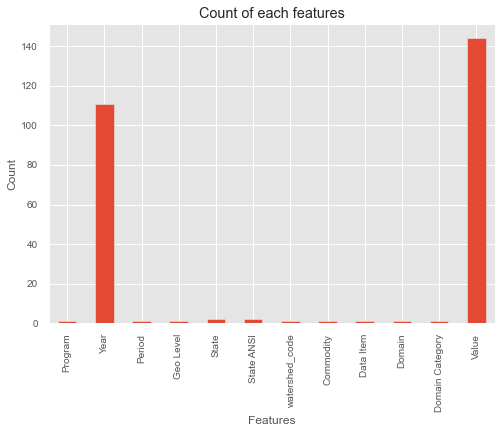

In [52]:
# First let's take a look at the number of unique 
# values in each column in a bar plot
hay.nunique().plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count of each features')
plt.style.use('seaborn')
plt.show()
plt.close()
# Find those columns with constant values


In [67]:
# Getting rid of features with constant values
nunq = hay.nunique()
for clm in hay:
    if clm == 'Commodity':
        continue
    elif nunq.loc[clm] == 1:
        hay.drop(clm, axis=1, inplace=True)
hay.head()

Year    State  State ANSI Commodity  Value
0  2019    IDAHO          16       HAY   3.93
1  2019  MONTANA          30       HAY   2.08
2  2018    IDAHO          16       HAY   3.75
3  2018  MONTANA          30       HAY   1.93
4  2017    IDAHO          16       HAY   3.59

## Pre-Processing & Exploring the Data
Now that we have crop data ready for analysis, we should now prepare the climate data. 
* Climate variables should be averaged for each state
* Then we need to aggregate all climate features thorugh each year.
    * Some features require averging, such as mean temperature, some require to be summed such as 'Biologically Effective Degree Days'
    * Note that each feature in climate data can have completely different effect depending on the season or month. For example while frost days can have a devastating effect on April it might have no effect at all on January. Therefore for some climate variables I should treat each month as a separate feature. 
    

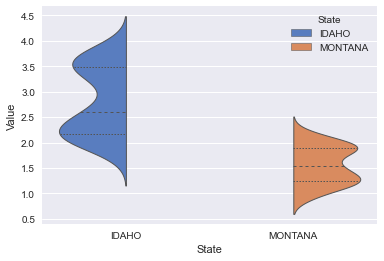

In [89]:
# gorupby state and barplot for values and other features
#sns.set_theme(style="whitegrid")
sns.violinplot(data=hay, x="State",y="Value", hue="State",
               split=True, inner="quart", linewidth=1,
               palette="muted", order=["IDAHO", "MONTANA"],
               scale='count')
sns.despine(left=True)

In [49]:
hay.profile_report()

Render HTML: 100%|██████████| 1/1 [00:00&lt;00:00,  1.44it/s]


&lt;IPython.core.display.HTML object&gt;

In [ ]:
#Turkey
#clim_loc = clim.where((clim.lat > 30) & (clim.lat < 50) & (clim.lon >20 ) & (clim.lon < 45), drop=True)
#shdf = salem.read_shapefile(salem.get_demo_file('world_borders.shp'))
#shdf = shdf.loc[shdf['CNTRY_NAME'] == 'Turkey']